In [1]:
import time
import ROOT
import math
import numpy as np
import pandas as pd
import root_numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm

Welcome to JupyROOT 6.22/02


In [2]:
def getData(inputFiles):
    data = root_numpy.root2array(inputFiles, "Tree", \
                                 branches=['evid','xsec','ntrials','pt_jet', 'p_jet', 'eta_jet', 'phi_jet', 'theta_jet'])
    return pd.DataFrame(data)

In [3]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print (text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut))
    return cutDataframe

In [4]:
def toArrayFloat(begin, end, interval=0, log=False, logNum=0):
    array = []
    if log==True:
        array = np.logspace(begin, end, num=logNum)
    else:
        length = int((end - begin) / interval + 1)
        for i in range(0,length):
            array.append((float(begin + interval * i))) 
    return array

In [5]:
def getInterval(arrayFloat):
    interval = np.zeros(len(arrayFloat)-1)
    for i in range(0,len(arrayFloat)-1):
        interval[i] = arrayFloat[i+1] - arrayFloat[i]
    return interval

In [6]:
def getHist(df, var, binEdges):
        
    x = []
    for i in range(0,len(binEdges)-1):
        x.append((binEdges[i] + binEdges[i+1]) / 2)
    
    y = np.histogram(df[var], bins=binEdges)[0]
    
    xerr = getInterval(binEdges)/2
    
    yerr = np.sqrt(y)
    
    return x, y, xerr, yerr

In [7]:
def keepOneJet(inputDataframe):    
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.loc[~dataframe['evid'].duplicated(keep='first')]
    print ('\n','Remove extra jets',cutDataframe.shape[0],' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut))
    return cutDataframe

In [8]:
def flattenDf(a):
    pt_array = np.hstack(np.asarray(a['pt_jet']))
    eta_array = np.hstack(np.asarray(a['eta_jet']))
    d = {'pt_jet': pt_array, 'eta_jet': eta_array}
    df = pd.DataFrame(data=d)
    df
    return df

In [9]:
file1 = ['$HOME/output/51005_1108.root']

In [10]:
a = getData(file1)

In [11]:
a

,evid,xsec,ntrials,pt_jet,p_jet,eta_jet,phi_jet,theta_jet
0,0,32.645405,1,"[1.2053608, 0.29062593, 0.4221176, 1.0269989, ...","[16.84466, 3.4307084, 3.928925, 8.060831, 2.29...","[-3.3291194, -3.1598334, -2.921086, -2.74944, ...","[3.3310413, 2.2586944, 4.331904, 5.2979217, 2....","[3.069974, 3.056778, 3.0339465, 3.0138392, 2.9..."
1,1,37.850784,2,[],[],[],[],[]
2,2,37.850784,3,"[0.37981442, 0.24882749, 0.3138361, 0.93032646...","[5.0369263, 2.6105585, 2.4030852, 6.0496817, 0...","[-3.276591, -3.0414279, -2.7244935, -2.5594072...","[5.8235493, 1.8114407, 4.635877, 3.3773475, 1....","[3.066115, 3.0461318, 3.0106213, 2.9871988, 2...."
3,3,37.850784,4,"[1.169587, 0.31921408, 0.33755273, 0.8123443, ...","[9.167047, 2.0487196, 1.9479972, 2.2327108, 1....","[-2.748017, -2.5461302, -2.43839, -1.6693249, ...","[4.998795, 0.070251755, 2.1165416, 4.374888, 3...","[3.013658, 2.9851437, 2.9674315, 2.769208, 2.6..."
4,4,37.850784,5,"[1.0561368, 0.3330148, 1.1599444, 0.2651365, 0...","[11.675229, 2.6669836, 7.7600107, 1.5500776, 1...","[-3.0939467, -2.7697427, -2.5881255, -2.451566...","[1.5071031, 4.439891, 1.3938484, 3.464764, 6.1...","[3.0510092, 3.0164, 2.991553, 2.9697, 2.861007..."
...,...,...,...,...,...,...,...,...
999995,999995,48.049965,999996,"[0.5207943, 0.54506785, 0.60894066, 0.23744586...","[5.0273633, 2.601556, 2.5287163, 0.9312109, 1....","[-2.9577494, -2.2449427, -2.10207, -2.0430276,...","[6.089914, 4.2519217, 5.918906, 0.14608718, 2....","[3.0378146, 2.9305127, 2.8983922, 2.8837593, 2..."
999996,999996,48.049965,999997,"[1.6371254, 0.3929236, 0.22314496, 0.6002122, ...","[13.709621, 2.6979609, 1.016205, 2.66438, 2.52...","[-2.814719, -2.6144383, -2.1968775, -2.1706553...","[1.4309654, 6.217759, 4.192109, 0.43762642, 2....","[3.0218928, 2.9954357, 2.920202, 2.9143696, 2...."
999997,999997,48.049965,999998,"[0.32405072, 0.6350378, 0.5900213, 1.026022, 0...","[2.562788, 4.408288, 3.1121876, 4.402697, 3.54...","[-2.757077, -2.6254754, -2.3469605, -2.1358128...","[2.0831492, 3.0107563, 4.687581, 0.31844184, 3...","[3.0148087, 2.9970343, 2.950854, 2.906386, 2.8..."
999998,999998,48.049965,999999,"[0.27017683, 0.36071578, 1.1243956, 1.2547517,...","[4.1535172, 2.6563416, 4.042677, 2.7390683, 2....","[-3.4247217, -2.6851196, -1.9528828, -1.416676...","[3.2810717, 2.284839, 5.8159323, 1.3320194, 5....","[3.076499, 3.0053775, 2.8597443, 2.6657424, 2...."


In [12]:
b = flattenDf(a)

In [13]:
b

,pt_jet,eta_jet
0,1.205361,-3.329119
1,0.290626,-3.159833
2,0.422118,-2.921086
3,1.026999,-2.749440
4,0.337575,-2.602932
...,...,...
18511906,0.453650,1.551558
18511907,0.365872,1.662381
18511908,0.628980,2.763315
18511909,0.541301,2.950686


In [14]:
df1 = applyCut(b, 'abs(eta_jet) < 0.5', 'abs(eta) < 0.5')
df2 = applyCut(b, '0.5 < abs(eta_jet) < 0.9', '0.5 < abs(eta) < 0.9')
df3 = applyCut(b, '2.5 < eta_jet < 4.0', '2.5 < eta < 4.0')

abs(eta) < 0.5 2604328  fraction kept: 14.1
0.5 < abs(eta) < 0.9 2122517  fraction kept: 11.5
2.5 < eta < 4.0 2509341  fraction kept: 13.6


In [24]:
xvar_array = toArrayFloat(0.95, 1.90, 0, log=True, logNum=11)
xsec = np.mean(a['xsec'])
ntrials = a['ntrials'][a.shape[0]-1]
x1, y1, xerr, yerr1 = getHist(df1, 'pt_jet', xvar_array)
x2, y2, xerr, yerr2 = getHist(df2, 'pt_jet', xvar_array)
x3, y3, xerr, yerr3 = getHist(df3, 'pt_jet', xvar_array)

Text(65, 5, '$\\sqrt{s} = 510 \\, \\mathrm{GeV}$ \n R = 0.5')

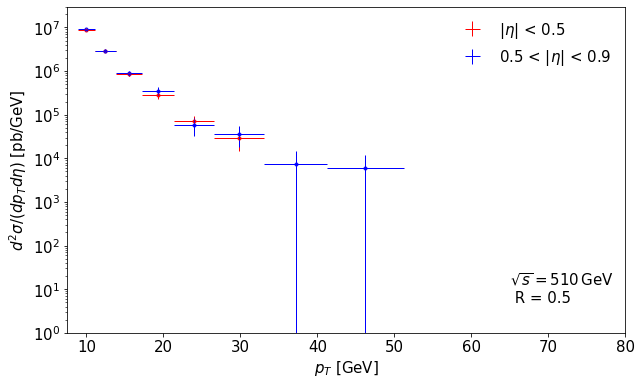

In [16]:
fig = plt.figure(figsize=(10,6))
plt.errorbar(x1, y1*xsec*1e9/(2*ntrials*xerr*1), xerr = xerr, yerr = yerr1*xsec*1e9/(2*ntrials*xerr*1),\
             fmt='none', color='r', elinewidth=1, label='|$\eta$| < 0.5')
plt.plot(x1, y1*xsec*1e9/(2*ntrials*xerr*1), 'r.', fillstyle='none')
plt.errorbar(x2, y2*xsec*1e9/(2*ntrials*xerr*0.8), xerr = xerr, yerr = yerr2*xsec*1e9/(2*ntrials*xerr*0.8),\
             fmt='none', color='b', elinewidth=1, label='0.5 < |$\eta$| < 0.9')
plt.plot(x2, y2*xsec*1e9/(2*ntrials*xerr*0.8), 'b.', fillstyle='none')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlabel('$p_T$ [GeV]', fontsize=15)
plt.ylabel(r'$d^2 \sigma / (dp_T d \eta)$ [pb/GeV]', fontsize=15)
plt.xlim(left=7.5, right=80)
plt.ylim(top=3e7, bottom=1)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.text(65,5,'$\sqrt{s} = 510 \, \mathrm{GeV}$ \n R = 0.5', fontsize=15)

Text(25, 5, '$\\sqrt{s} = 510 \\, \\mathrm{GeV}$ \n R = 0.5')

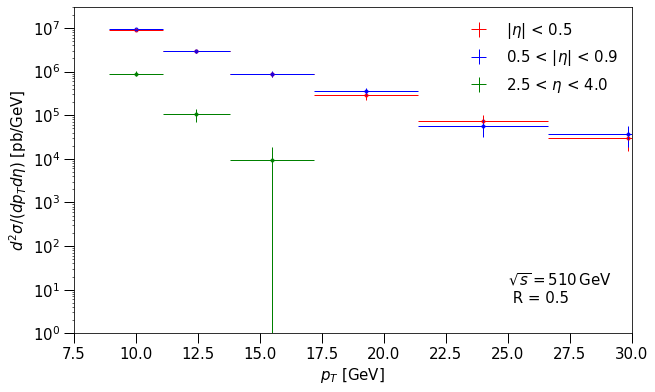

In [25]:
fig = plt.figure(figsize=(10,6))
plt.errorbar(x1, y1*xsec*1e9/(2*ntrials*xerr*1), xerr = xerr, yerr = yerr1*xsec*1e9/(2*ntrials*xerr*1),\
             fmt='none', color='r', elinewidth=1, label='|$\eta$| < 0.5')
plt.plot(x1, y1*xsec*1e9/(2*ntrials*xerr*1), 'r.', fillstyle='none')
plt.errorbar(x2, y2*xsec*1e9/(2*ntrials*xerr*0.8), xerr = xerr, yerr = yerr2*xsec*1e9/(2*ntrials*xerr*0.8),\
             fmt='none', color='b', elinewidth=1, label='0.5 < |$\eta$| < 0.9')
plt.plot(x2, y2*xsec*1e9/(2*ntrials*xerr*0.8), 'b.', fillstyle='none')
plt.errorbar(x3, y3*xsec*1e9/(2*ntrials*xerr*1.5), xerr = xerr, yerr = yerr3*xsec*1e9/(2*ntrials*xerr*1.5),\
             fmt='none', color='g', elinewidth=1, label='2.5 < $\eta$ < 4.0')
plt.plot(x3, y3*xsec*1e9/(2*ntrials*xerr*1.5), 'g.', fillstyle='none')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params('both', length=10, width=1, which='major')
plt.yscale('log')
plt.xlabel('$p_T$ [GeV]', fontsize=15)
plt.ylabel(r'$d^2 \sigma / (dp_T d \eta)$ [pb/GeV]', fontsize=15)
plt.xlim(left=7.5, right=30)
plt.ylim(top=3e7, bottom=1)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.text(25,5,'$\sqrt{s} = 510 \, \mathrm{GeV}$ \n R = 0.5', fontsize=15)

In [27]:
xvar_array = toArrayFloat(0.30, 1.50, 0, log=True, logNum=11)
x3, y3, xerr, yerr3 = getHist(df3, 'pt_jet', xvar_array)

Text(12, 10000.0, '$\\sqrt{s} = 510 \\, \\mathrm{GeV}$ \n R = 0.5')

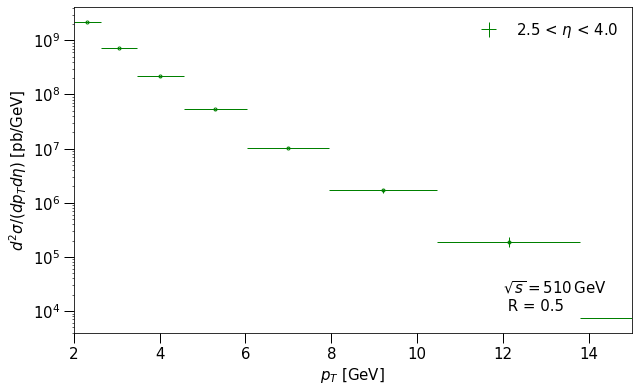

In [28]:
fig = plt.figure(figsize=(10,6))
plt.errorbar(x3, y3*xsec*1e9/(2*ntrials*xerr*1.5), xerr = xerr, yerr = yerr3*xsec*1e9/(2*ntrials*xerr*1.5),\
             fmt='none', color='g', elinewidth=1, label='2.5 < $\eta$ < 4.0')
plt.plot(x3, y3*xsec*1e9/(2*ntrials*xerr*1.5), 'g.', fillstyle='none')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params('both', length=10, width=1, which='major')
plt.yscale('log')
plt.xlabel('$p_T$ [GeV]', fontsize=15)
plt.ylabel(r'$d^2 \sigma / (dp_T d \eta)$ [pb/GeV]', fontsize=15)
plt.xlim(left=2.0, right=15)
#plt.ylim(top=3e7, bottom=1)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.text(12,1e4,'$\sqrt{s} = 510 \, \mathrm{GeV}$ \n R = 0.5', fontsize=15)